# Q1_Alireza Rashidi


## Working with Data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/BTC-USDT.csv", thousands=',')
reversed_df = df.iloc[::-1].reset_index(drop=True)
reversed_df

,Date,Price
0,6-Dec-20,19379.9
1,7-Dec-20,19170.7
2,8-Dec-20,18326.6
3,9-Dec-20,18546.0
4,10-Dec-20,18247.2
...,...,...
361,2-Dec-21,56496.0
362,3-Dec-21,53631.5
363,4-Dec-21,49195.2
364,5-Dec-21,49405.5


In [3]:
dayes = np.array(list( range(len(reversed_df))))
prices = reversed_df['Price'].to_numpy()
(dayes, prices)   # features: dayes,

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [4]:
POPULATION_SIZE = 100
chromosome_size = 5

first_days, sec_days, true_prices= prices[:100], prices[100:200], prices[200:300]

a, b = 0, 20
# generating initial population:
# one individual -> [gain, a, b, c, d] -> f(x) = (gain*a)x' - bx + c - d
def generate_individual(a, b, chromosome_size):
    return np.random.randint(a, b, chromosome_size) 
# [np.random.randint(0, 2, 10).tolist() for _ in range(POPULATION_SIZE)]

def init_population(size, a, b, chromosome_size):
    population = []
    for i in range(size):
        individual_chromosome = generate_individual(a, b , chromosome_size)
        population.append(individual_chromosome)
    return population

def fitness_func(chromosome):
    preds = (chromosome[0] * chromosome[1] * sec_days) - (chromosome[2] * first_days) + chromosome[3] - chromosome[4]
    return np.average( (true_prices - preds)**2 ) # using MSE for objective function.

def selection(population, scores, k=3):
	# first random selection
	selection_ix = np.random.randint(len(population))
	for ix in np.random.randint(0, len(population), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return population[selection_ix]

def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if np.random.rand() < r_cross:
		# select crossover point that is not on the end of the string
		crossover_point = np.random.randint(1, len(p1)-1)
		# perform crossover
		c1 = np.concatenate( (p1[:crossover_point], p2[crossover_point:]), axis=0)
		c2 = np.concatenate( (p2[:crossover_point], p1[crossover_point:]), axis=0)
	return [c1, c2]

def mutation(chromosome, r_mut):
	for i in range(len(chromosome)):
		# check for a mutation
		if np.random.rand() < r_mut:
			chromosome[i] = np.random.randint(a, b)

In [5]:
def genetic_algorithm(fitness_func, generations, n_pop, chromosome_size, r_cross, r_mut):
    score_lst = []
    pop = init_population(n_pop, a, b, chromosome_size)
    best, best_eval = 0, fitness_func(pop[0])
    for gen in range(generations):
        scores = [fitness_func(c) for c in pop]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                score_lst.append(best_eval)
                print(">generation: %d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = []
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        pop = children
    return best, best_eval, score_lst

In [6]:
 best, best_eval, score_lst = genetic_algorithm(fitness_func, 1000, POPULATION_SIZE, chromosome_size, 0.80, 0.45)

>generation: 0, new best f([ 2  3 11 13 17]) = 61229492788.732
>generation: 0, new best f([ 1  5 10  1  6]) = 57658239335.244
>generation: 0, new best f([ 0 15  1  4 17]) = 6536120242.409
>generation: 0, new best f([ 0  7  1 17  8]) = 6532641051.441
>generation: 3, new best f([ 0  0  0  6 14]) = 1761401747.101
>generation: 4, new best f([11  0  0  8 11]) = 1760986914.101
>generation: 5, new best f([ 0  8  0 19 11]) = 1760074457.501
>generation: 6, new best f([ 0  8  0 12  3]) = 1759991518.901
>generation: 8, new best f([ 0  6  0 13  2]) = 1759825647.701
>generation: 11, new best f([ 0  7  0 17  1]) = 1759411004.701
>generation: 11, new best f([ 1  1  1 10 10]) = 1573820005.861
>generation: 30, new best f([ 1  1  0  2 13]) = 277123721.486
>generation: 37, new best f([ 1  1  0  3 17]) = 277079332.412
>generation: 55, new best f([ 1  1  0  3 19]) = 277049749.696


Text(0, 0.5, 'number of scores')

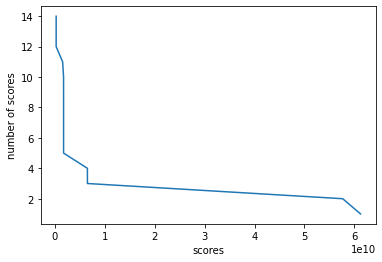

In [7]:
plt.plot(score_lst, range(1, len(score_lst) + 1))
plt.xlabel('scores')
plt.ylabel('number of scores')

In [8]:
preds = (best[0] * best[1] * sec_days) - (best[2] * first_days) + best[3] - best[4]
preds

array([56873.7, 58897.5, 57640. , 58072. , 58077.4, 57367.8, 54142.3,
       54436.5, 52309.4, 51306.3, 55020.1, 55846.9, 55749.2, 57600.2,
       58755.3, 58747.7, 58702.3, 58961.3, 57043.9, 58183.9, 58977.4,
       57980.3, 55932.7, 58061.4, 58102.7, 59732.4, 59962.7, 59847.8,
       63524.9, 62964.4, 63200. , 61363.7, 60025.9, 56191.1, 55630.1,
       56467.2, 53804.2, 51713.5, 51127.6, 50072.9, 48947.6, 54004.5,
       55020.5, 54825.4, 53544.8, 57704.3, 57791.1, 56587.8, 57153.8,
       53725.5, 57425.3, 56389.4, 57321.2, 58824.1, 58222.3, 55832.9,
       56679.7, 49368.2, 49688.6, 49823.8, 46692.8, 46410.4, 43525.3,
       42881.3, 36704.5, 40701.2, 37281.4, 37432.3, 34663.7, 38734.6,
       38362.3, 39233.2, 38401.3, 35646.5, 34568.6, 35636.8, 37282.6,
       36671.6, 37539.8, 39171.3, 36835.3, 35504. , 35799.4, 33562. ,
       33366.9, 37316.2, 36633.4, 37298.6, 35451.5, 39006.9, 40513.4,
       40140.1, 38320. , 38036. , 35733.4, 35497.4, 35579.8, 31676. ,
       32480.4, 3365